In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('combined_data/cleaned_data.parquet', engine='pyarrow')
df = df[df['Inbetriebnahmedatum'] > '1991-01-01']

In [ ]:
df_tariff = pd.read_csv('combined_data/feed_in_tariff_data_cleaned.csv')
df_tariff['date'] = pd.to_datetime(df_tariff['date'])

In [3]:
state_areas = {
    "Bayern": 70542,
    "Niedersachsen": 47710,
    "Baden-Württemberg": 35748,
    "Nordrhein-Westfalen": 34113,
    "Brandenburg": 29654,
    "Mecklenburg-Vorpommern": 23295,
    "Hessen": 21116,
    "Sachsen-Anhalt": 20467,
    "Rheinland-Pfalz": 19858,
    "Sachsen": 18450,
    "Thüringen": 16202,
    "Schleswig-Holstein": 15804,
    "Saarland": 2572,
    "Berlin": 891,
    "Hamburg": 755,
    "Bremen": 420
}

In [22]:
# Group the data by both 'Registrierungsdatum' by month and 'Bundesland', then count occurrences
df_time_series = df.groupby(df['Inbetriebnahmedatum'].dt.to_period('D')).size().to_frame(name='Count').reset_index()
df_time_series['Inbetriebnahmedatum'] = df_time_series['Inbetriebnahmedatum'].dt.to_timestamp()

df_time_series_cum = df_time_series.copy()
df_time_series_cum['Cumulative_Count'] = df_time_series_cum['Count'].cumsum()

## Total Installation Germany

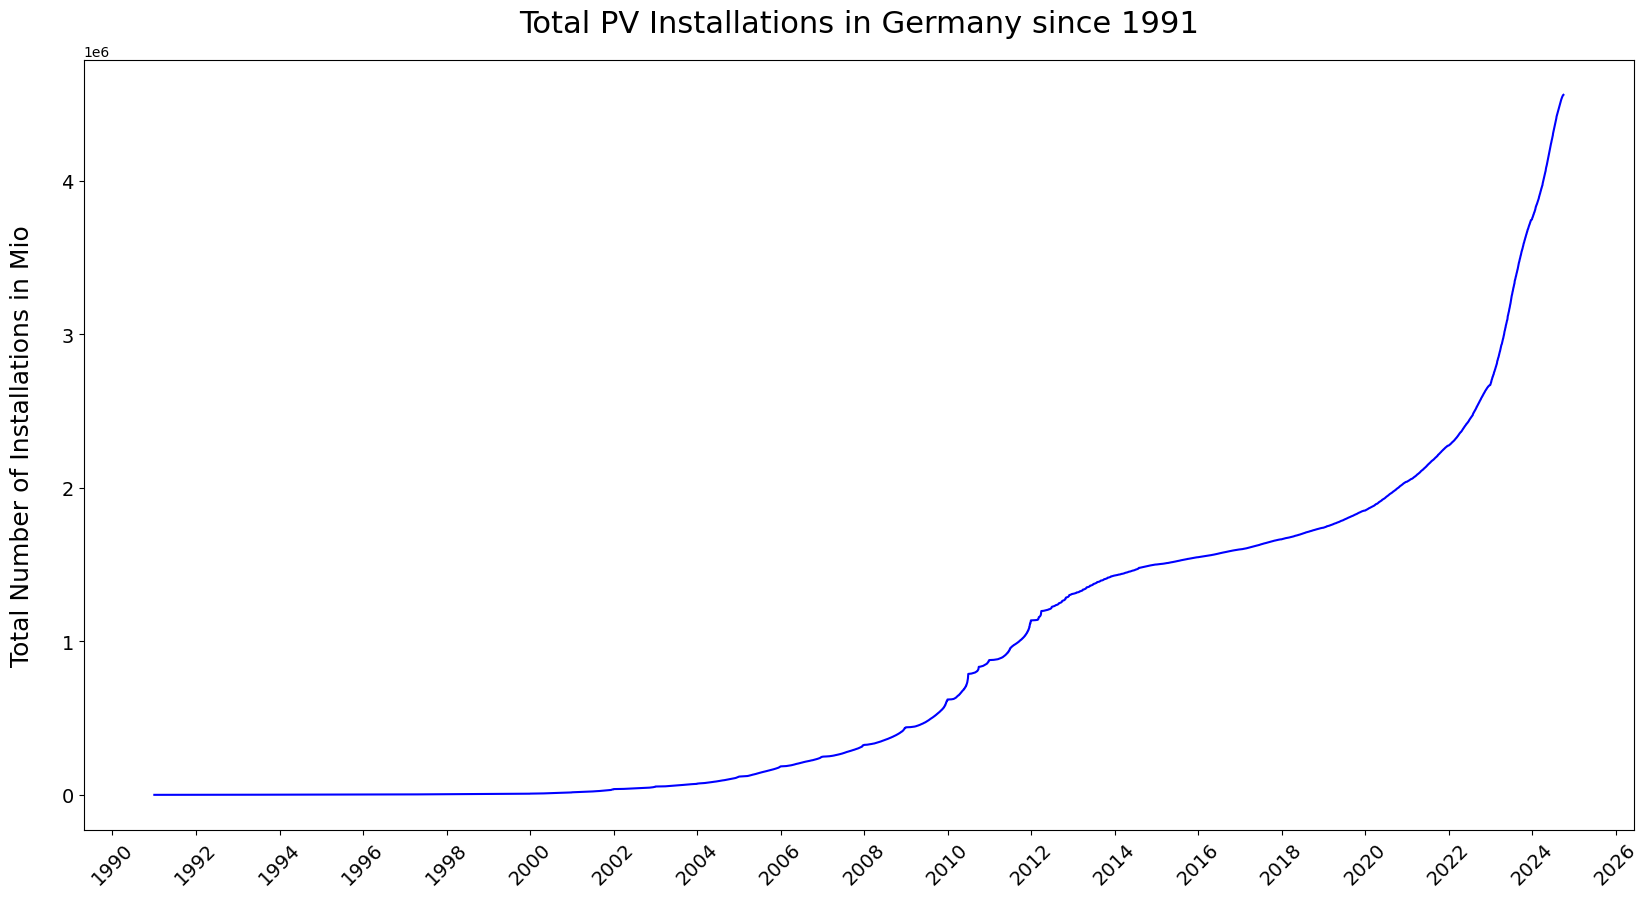

In [35]:
import matplotlib.dates as mdates


# Create a figure and axis object
fig, ax_total = plt.subplots(figsize=(20, 10))

# Create the Seaborn line plot for total development on the axis
sns.lineplot(data=df_time_series_cum, x='Inbetriebnahmedatum', y='Cumulative_Count', color='blue', ax=ax_total)

# Add title and labels
ax_total.set_title("Total PV Installations in Germany since 1991", fontsize=22, pad=20)
ax_total.set_xlabel(None)
ax_total.set_ylabel('Total Number of Installations in Mio', fontsize=18, labelpad=20)

# Set x-axis ticks to display every two years
ax_total.xaxis.set_major_locator(mdates.YearLocator(2))

ax_total.tick_params(axis='x', labelsize=14)  # Increase font size for x-axis ticks
ax_total.tick_params(axis='y', labelsize=14)  # Increase font size for y-axis ticks

# Rotate x-axis labels for better readability
plt.setp(ax_total.get_xticklabels(), rotation=45)

# Save the plot
plt.savefig("plots/germany_total_pv_registrations.png")

In [ ]:
# Create a figure and axis object
fig, ax_total = plt.subplots(figsize=(12, 8))

# Create the Seaborn line plot for total development on the axis
sns.lineplot(data=df_time_series_cum, x='Inbetriebnahmedatum', y='Cumulative_Count', color='blue', ax=ax_total)

# Add vertical lines for the legislation dates
ax_total.axvline(pd.to_datetime('1991-12-01'), color='red', linestyle='--', linewidth=1)
ax_total.axvline(pd.to_datetime('2000-03-29'), color='green', linestyle='--', linewidth=1)
ax_total.axvline(pd.to_datetime('2004-08-01'), color='green', linestyle='--', linewidth=1)
ax_total.axvline(pd.to_datetime('2009-01-01'), color='green', linestyle='--', linewidth=1)
ax_total.axvline(pd.to_datetime('2012-01-01'), color='green', linestyle='--', linewidth=1)
ax_total.axvline(pd.to_datetime('2014-08-01'), color='green', linestyle='--', linewidth=1)
ax_total.axvline(pd.to_datetime('2021-07-01'), color='green', linestyle='--', linewidth=1)
ax_total.axvline(pd.to_datetime('2023-01-01'), color='green', linestyle='--', linewidth=1)

offset_days = pd.Timedelta(days=30)  # Offset for label placement
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white", alpha=0.8)

# Add text labels next to each vertical line
ax_total.text(pd.to_datetime('1991-12-01') + offset_days, ax_total.get_ylim()[1] * 0.9, 'Electricity Feed-in Act\n(1 Dec 1991)', color='red', ha='left', fontsize=10)
ax_total.text(pd.to_datetime('2000-03-29') + offset_days, ax_total.get_ylim()[1] * 0.9, 'EEG', color='green', ha='left', fontsize=10)
ax_total.text(pd.to_datetime('2004-08-01') + offset_days, ax_total.get_ylim()[1] * 0.9, 'EEG 2004', color='green', ha='left', fontsize=10)
ax_total.text(pd.to_datetime('2009-01-01') + offset_days, ax_total.get_ylim()[1] * 0.9, 'EEG 2009', color='green', ha='left', fontsize=10)
ax_total.text(pd.to_datetime('2012-01-01') + offset_days, ax_total.get_ylim()[1] * 0.8, 'PV Amendment', color='green', ha='left', fontsize=10, bbox=bbox_props)
ax_total.text(pd.to_datetime('2014-08-01') + offset_days, ax_total.get_ylim()[1] * 0.2, 'EEG 2014', color='green', ha='left', fontsize=10)
ax_total.text(pd.to_datetime('2021-07-01') + offset_days, ax_total.get_ylim()[1] * 0.2, 'EEG 2021', color='green', ha='left', fontsize=10, bbox=bbox_props)
ax_total.text(pd.to_datetime('2023-01-01') + offset_days, ax_total.get_ylim()[1] * 0.1, 'EEG 2023', color='green', ha='left', fontsize=10)


# Add title and labels
ax_total.set_title('PV Installations in Germany vs Policy Changes', fontsize=16)
ax_total.set_xlabel(None)
ax_total.set_ylabel('Total Number of Installations', fontsize=12, labelpad=20)

# Rotate x-axis labels for better readability
plt.setp(ax_total.get_xticklabels(), rotation=45)

# Show the plot
plt.savefig("plots/germany_total_pv_registrations_policies.png")

In [ ]:
# Merge total registrations data with feed-in tariff data on date
merged_data = pd.merge(
    df_time_series_cum,
    df_tariff[['date', 'bis 10 kW']],
    left_on='Inbetriebnahmedatum',
    right_on='date',
    how='left'
)

In [ ]:
# Plot total registrations and feed-in tariff over time with dual y-axes
fig, ax_total_tif = plt.subplots(figsize=(12, 8))

# Plot total registrations on primary y-axis
sns.lineplot(data=merged_data, x='Inbetriebnahmedatum', y='Cumulative_Count', ax=ax_total_tif, color='blue')
ax_total_tif.set_title('PV Installations in Germany vs Feed-in Tariff', fontsize=16)
ax_total_tif.set_xlabel(None)
ax_total_tif.set_ylabel('Total Number of Installations', fontsize=12, labelpad=20)
ax_total_tif.tick_params(axis='x', rotation=45)

# Create secondary y-axis for the feed-in tariff
ax2 = ax_total_tif.twinx()
sns.lineplot(data=merged_data, x='Inbetriebnahmedatum', y='bis 10 kW', ax=ax2, color='green')
ax2.set_ylabel('Feed in Tariff (ct/kW)', fontsize=12, labelpad=20)

# Save and show the plot
plt.savefig("plots/germany_total_pv_registrations_vs_tariff.png")

## Total Installations Per State

In [4]:
df_time_series_by_state = df.groupby([df['Inbetriebnahmedatum'].dt.to_period('D'), 'Bundesland']).size().reset_index(name='Count')
df_time_series_by_state['Inbetriebnahmedatum'] = df_time_series_by_state['Inbetriebnahmedatum'].dt.to_timestamp()

df_time_series_by_state['Cumulative_Count'] = df_time_series_by_state.groupby('Bundesland')['Count'].cumsum()

In [5]:
# Reshape the DataFrame if you need a "melted" format for further plotting
df_melted = df_time_series_by_state.melt(id_vars=['Inbetriebnahmedatum', 'Bundesland'], value_vars=['Cumulative_Count'],
                                         var_name='Metric', value_name='value')

In [ ]:
total_installation_per_state = df['Bundesland'].value_counts()

In [6]:
# Adding normalized cumulative counts
df_melted['Normalized_Cumulative_Count'] = df_melted.apply(
    lambda x: x['value'] / state_areas[x['Bundesland']] if x['Bundesland'] in state_areas else None, axis=1
)

In [20]:
df_melted.loc[
df_melted['Inbetriebnahmedatum'] == '2023-09-30'].sort_values(by='Normalized_Cumulative_Count', ascending=False)[[
    'Bundesland', 'value', 'Normalized_Cumulative_Count'
]]

,Bundesland,value,Normalized_Cumulative_Count
101619,Berlin,23921,26.847363
101626,Nordrhein-Westfalen,621292,18.212763
101617,Baden-Württemberg,593161,16.592844
101628,Saarland,41133,15.992613
101622,Hamburg,11708,15.507285
101621,Bremen,5901,14.050000
101618,Bayern,921855,13.068172
101623,Hessen,230011,10.892735
101627,Rheinland-Pfalz,204456,10.295901
101625,Niedersachsen,366635,7.684657


In [ ]:
# Create the Seaborn line plot
fig, ax_ps_normal = plt.subplots(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Inbetriebnahmedatum', y='Normalized_Cumulative_Count', hue='Bundesland', ax=ax_ps_normal)

# Add title and labels
ax_ps_normal.set_title('Normalized PV Installations per State', fontsize=16)
ax_ps_normal.set_xlabel(None)
ax_ps_normal.set_ylabel('Number of Installations / km2', fontsize=12, labelpad=20)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Save and show the plot
plt.savefig("plots/total_pv_registrations_per_state_normalized.png")

In [ ]:
# Create the Seaborn line plot
fig, ax_bln_hmb = plt.subplots(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Inbetriebnahmedatum', y='value', hue='Bundesland', ax=ax_bln_hmb)

# Add title and labels
ax_bln_hmb.set_title('PV Installations per State', fontsize=16)
ax_bln_hmb.set_xlabel(None)
ax_bln_hmb.set_ylabel('Number of Installations', fontsize=12, labelpad=20)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Save and show the plot
plt.savefig("plots/total_pv_registrations_per_state.png")

## Comparison

In [ ]:
monthly_avg = df_time_series.groupby(df_time_series['Inbetriebnahmedatum'].dt.to_period("M")).Count.mean().reset_index()
monthly_avg.columns = ['Month', 'Average_Count']

## Policies

In [ ]:
solar_mandates = {
    "Baden-Württemberg": "2022-03-01",
    "Bayern": "2023-06-01",
    "Berlin": "2023-01-01",
    "Brandenburg": "2024-06-01",
    "Bremen": "2024-07-01",
    "Hamburg": "2023-01-01",
    "Hessen": "2023-01-01",
    "Niedersachsen": "2023-01-01",
    "Nordrhein-Westfalen": "2024-01-01",
    "Rheinland-Pfalz": "2023-01-01",
    "Schleswig-Holstein": "2023-01-01"
}

solar_mandates = {k: pd.to_datetime(v) for k, v in solar_mandates.items()}

In [ ]:
df_time_series_by_state['Mandate_Flag'] = df_time_series_by_state.apply(
    lambda row: 1 if row['Inbetriebnahmedatum'] >= solar_mandates.get(row['Bundesland'], pd.Timestamp('2100-01-01')) else 0,
    axis=1
)

In [ ]:
df_time_series_by_state

In [ ]:
# Identify states where Mandate_Flag is always zero
states_with_zero_mandate = df_time_series_by_state.groupby('Bundesland')['Mandate_Flag'].sum()
states_with_zero_mandate = states_with_zero_mandate[states_with_zero_mandate == 0].index

# Filter data to include only these states
filtered_data_permanent_zero = df_time_series_by_state[df_time_series_by_state['Bundesland'].isin(states_with_zero_mandate)]

# Group by date to sum 'Count' and 'Cumulative_Count' for the filtered states
aggregated_data_permanent_zero = filtered_data_permanent_zero.groupby('Inbetriebnahmedatum', as_index=False).agg({
    'Count': 'sum',
    'Cumulative_Count': 'sum'
})

# Add the new state 'Permanent_Zero_Mandate' with the aggregated counts
aggregated_data_permanent_zero['Bundesland'] = 'Permanent_Zero_Mandate'

# Add the 'YearMonth' column for consistency with the original data
aggregated_data_permanent_zero['YearMonth'] = pd.to_datetime(aggregated_data_permanent_zero['Inbetriebnahmedatum']).dt.to_period('M').astype(str)

# Sort by date to ensure cumulative calculation is accurate
aggregated_data_permanent_zero = aggregated_data_permanent_zero.sort_values('Inbetriebnahmedatum')

# Recalculate the cumulative sum for 'Permanent_Zero_Mandate'
aggregated_data_permanent_zero['Cumulative_Count'] = aggregated_data_permanent_zero['Count'].cumsum()

# Combine with the original data
df_time_series_by_state_with_control = pd.concat([df_time_series_by_state, aggregated_data_permanent_zero], ignore_index=True)

In [ ]:
# Filter out data by mandate flag and calculate the monthly average installations
monthly_data = data.groupby(['YearMonth', 'Bundesland', 'Mandate_Flag']).agg({'Count': 'sum'}).reset_index()
monthly_avg = monthly_data.groupby(['Bundesland', 'Mandate_Flag'])['Count'].mean().reset_index()

# Separate monthly averages for mandate flag 0 and 1
flag_0_avg = monthly_avg[monthly_avg['Mandate_Flag'] == 0].rename(columns={'Count': 'Avg_Count_Flag_0'})
flag_1_avg = monthly_avg[monthly_avg['Mandate_Flag'] == 1].rename(columns={'Count': 'Avg_Count_Flag_1'})

# Merge the monthly averages for mandate flags 0 and 1 to calculate percentage change for each state
merged_avg = pd.merge(flag_0_avg, flag_1_avg, on='Bundesland', how='inner')
merged_avg['Percentage_Change'] = ((merged_avg['Avg_Count_Flag_1'] - merged_avg['Avg_Count_Flag_0']) / 
                                   merged_avg['Avg_Count_Flag_0']) * 100

# For 'Permanent_Zero_Mandate', filter data where mandate flag is always 0 and calculate the monthly average
permanent_zero_mandate = data[data['Bundesland'] == 'Permanent_Zero_Mandate']
permanent_zero_avg = permanent_zero_mandate.groupby('YearMonth')['Count'].mean().reset_index(name='Avg_Count')

# Calculate the percentage change in monthly average for "Permanent_Zero_Mandate" in the same time frame
# Get time range based on available data in mandate flag 1 for comparability
mandate_period = data[data['Mandate_Flag'] == 1]['YearMonth'].unique()
permanent_zero_in_period = permanent_zero_avg[permanent_zero_avg['YearMonth'].isin(mandate_period)]
permanent_zero_before_period = permanent_zero_avg[~permanent_zero_avg['YearMonth'].isin(mandate_period)]

# Calculate averages before and during mandate periods
permanent_zero_before_avg = permanent_zero_before_period['Avg_Count'].mean()
permanent_zero_during_avg = permanent_zero_in_period['Avg_Count'].mean()

# Calculate the percentage change for "Permanent_Zero_Mandate"
permanent_zero_percentage_change = ((permanent_zero_during_avg - permanent_zero_before_avg) / 
                                    permanent_zero_before_avg) * 100

In [ ]:
data

In [ ]:
control_data_list = []

# Loop through each state and calculate control values based on each state's mandate period
for state in merged_avg['Bundesland'].unique():
    # Filter data for the specific state
    state_data = data[data['Bundesland'] == state]
    
    # Identify the period when mandate flag is 1 for this state
    mandate_period_state = state_data[state_data['Mandate_Flag'] == 1]['YearMonth'].unique()
    
    # Calculate control data for the same period using "Permanent_Zero_Mandate"
    permanent_zero_state_in_period = permanent_zero_avg[permanent_zero_avg['YearMonth'].isin(mandate_period_state)]
    permanent_zero_state_before_period = permanent_zero_avg[~permanent_zero_avg['YearMonth'].isin(mandate_period_state)]
    
    # Calculate the before and during averages
    before_avg = permanent_zero_state_before_period['Avg_Count'].mean()
    during_avg = permanent_zero_state_in_period['Avg_Count'].mean()
    
    # Calculate the percentage change for control period
    percentage_change_control = ((during_avg - before_avg) / before_avg) * 100 if before_avg else 0
    
    # Append control data to the list
    control_data_list.append({
        'Bundesland': f"{state}_control",
        'Avg_Count_Flag_0': before_avg,
        'Avg_Count_Flag_1': during_avg,
        'Percentage_Change': percentage_change_control
    })

# Convert control data list to DataFrame
control_data_all_states = pd.DataFrame(control_data_list)

# Concatenate the control data with the original table
final_table_individual_control = pd.concat([merged_avg, control_data_all_states], ignore_index=True)

In [ ]:
final_table_individual_control

In [ ]:
control_data

In [ ]:
final_table_individual_control

In [ ]:
control_data

In [ ]:
# Re-create the plot with separate bars for each state's original and control values

# Define bar width for better spacing between paired bars
bar_width = 0.4
states = original_data['Bundesland']

# Define positions for the bars
original_positions = range(len(states))
control_positions = [pos + bar_width for pos in original_positions]

# Plot the original and control values with separate bars for each state
plt.figure(figsize=(14, 10))
plt.bar(original_positions, original_data['Percentage_Change'], width=bar_width, label='After Mandate')
plt.bar(control_positions, control_data['Percentage_Change'], width=bar_width, label='Control', alpha=0.6)

# Set labels and title
plt.xlabel('Percentage Change in Monthly Average Count')
plt.ylabel('State')
plt.title('Percentage Change in Monthly Average Count per State: After Mandate vs. Control')
plt.xticks([pos + bar_width / 2 for pos in original_positions], states, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### TODO

- Normalize: per capita + per area
- Add Policies as vertical lines